In [1]:
import os 
import pandas as pd
import numpy as np
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data=pd.read_table('TV2_001.tsv', on_bad_lines='skip')
data
print(len(data))

207


In [3]:
#data.loc[:,['Tx.1','Ty.1','Tz.1']]

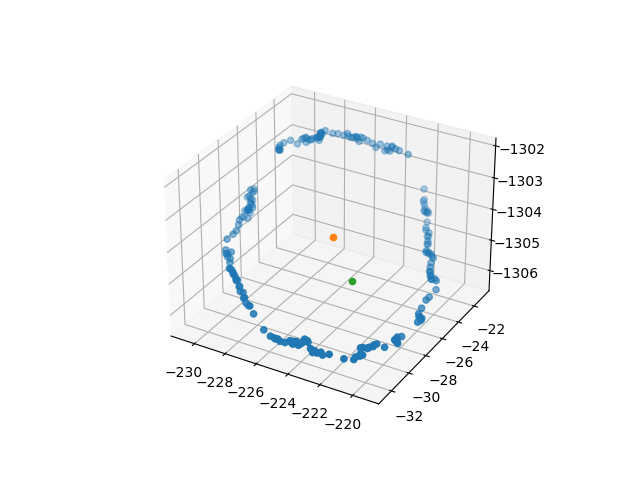

In [4]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']]);
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2);
ax.scatter3D(data['Tx.3'].mean(),data['Ty.3'].mean(),data['Tz.3'].mean())

In [5]:
print('calculated center (x,y,z) : ({}, {}, {})'.format((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2))
print('marker position (x,y,z) : ({}, {}, {})'.format(data['Tx.3'].mean(),data['Ty.3'].mean(),data['Tz.3'].mean()))

calculated center (x,y,z) : (-224.98899999999998, -26.725, -1304.215)
marker position (x,y,z) : (-223.99295652173936, -26.37814009661837, -1305.547323671497)


In [6]:
print('distance between the calculated center and the marker position in = {} mm'.format(np.sqrt((data['Tx.3'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.3'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.3'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_pos=np.sqrt((data['Tx.3'].mean()-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+(data['Ty.3'].mean()-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+(data['Tz.3'].mean()-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the marker position in = 1.6992647730094563 mm


In [7]:
data_after=pd.read_table('TV2_after_000.tsv', on_bad_lines='skip')
#data_after

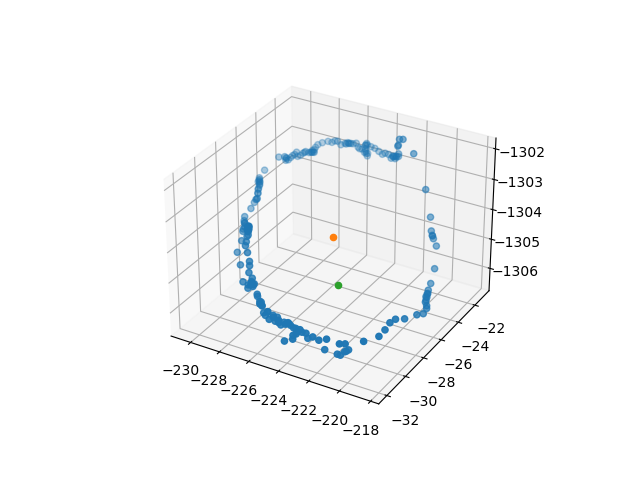

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']], cmap='Greens');
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2);
ax.scatter3D(data_after['Tx.2'].mean(),data_after['Ty.2'].mean(),data_after['Tz.2'].mean())

In [9]:
print('calculated center after manual repositioning (x,y,z) : ({}, {}, {})'.format((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2))
print('marker position after manual repositioning (x,y,z) : ({}, {}, {})'.format(data_after['Tx.2'].mean(),data_after['Ty.2'].mean(),data_after['Tz.2'].mean()))

calculated center after manual repositioning (x,y,z) : (-224.425, -26.5535, -1304.2145)
marker position after manual repositioning (x,y,z) : (-224.08453140096609, -26.58880676328501, -1305.7504057971016)


In [10]:
print('distance between the calculated center after manual repositioning and the marker position after manual repositioning in = {} mm'.format(np.sqrt((data_after['Tx.2'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(data_after['Ty.2'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(data_after['Tz.2'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)))
d_cal_af_pos_af=np.sqrt((data_after['Tx.2'].mean()-(data_after['Tx'].max()+data_after['Tx'].min())/2)**2+(data_after['Ty.2'].mean()-(data_after['Ty'].max()+data_after['Ty'].min())/2)**2+(data_after['Tz.2'].mean()-(data_after['Tz'].max()+data_after['Tz'].min())/2)**2)

distance between the calculated center after manual repositioning and the marker position after manual repositioning in = 1.5735857307538155 mm


In [11]:
print('distance between the calculated center and the calculated center after manual repositioning in = {} mm'.format(np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)))
d_cal_cal_af=np.sqrt(((data_after['Tx'].max()+data_after['Tx'].min())/2-(data['Tx.1'].max()+data['Tx.1'].min())/2)**2+((data_after['Ty'].max()+data_after['Ty'].min())/2-(data['Ty.1'].max()+data['Ty.1'].min())/2)**2+((data_after['Tz'].max()+data_after['Tz'].min())/2-(data['Tz.1'].max()+data['Tz.1'].min())/2)**2)

distance between the calculated center and the calculated center after manual repositioning in = 0.5894985156893615 mm


In [12]:
d_pos_pos_after=np.sqrt((data_after['Tx.2'].mean()-data['Tx.3'].mean())**2+
                        (data_after['Ty.2'].mean()-data['Ty.3'].mean())**2+
                        (data_after['Tz.2'].mean()-data['Tz.3'].mean())**2)
print('distance between the marker position and the marker position after manual repositioning in = {} mm'.format(d_pos_pos_after))
f = open("TV2_1.txt", "w")
f.write("{}\n{}\n{}\n{}\n".format(d_cal_pos,d_cal_af_pos_af,d_cal_cal_af,d_pos_pos_after))
f.close()

distance between the marker position and the marker position after manual repositioning in = 0.3066084680662211 mm


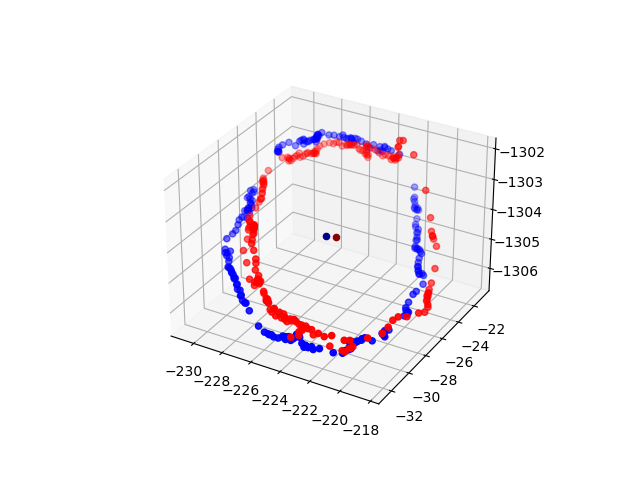

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_after.loc[:,['Tx']], data_after.loc[:,['Ty']], data_after.loc[:,['Tz']], c='red');
ax.scatter3D((data_after['Tx'].max()+data_after['Tx'].min())/2,
              (data_after['Ty'].max()+data_after['Ty'].min())/2,
              (data_after['Tz'].max()+data_after['Tz'].min())/2, c='darkred');

ax.scatter3D(data.loc[:,['Tx.1']], data.loc[:,['Ty.1']], data.loc[:,['Tz.1']], c='blue');
ax.scatter3D((data['Tx.1'].max()+data['Tx.1'].min())/2,
              (data['Ty.1'].max()+data['Ty.1'].min())/2,
              (data['Tz.1'].max()+data['Tz.1'].min())/2, c='darkblue');